In [136]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [137]:
#read the dataset
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
df = pd.read_csv("iris.csv",names=cls)

In [138]:
df

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [139]:
# divide the dataset into class and target variable
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
df.iloc[:,4]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

In [146]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)
print(len(X_train))
print(len(X_test))

120
30


In [147]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train = lda.fit_transform(X_train,y_train)
X_test  = lda.transform(X_test)

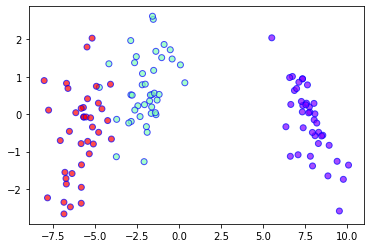

In [148]:
# plot the scatterplot
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',alpha=0.7,edgecolors='b')
plt.show()

In [149]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth= 2,random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [150]:
# print the accuracy
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))

Accuracy : 0.9666666666666667


In [151]:
#print the confusion matrix
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
